### Análise de Dados: Pima Indians Diabetes Dataset

#### Fonte [Kaggle - Pima Indians diabetes database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)



Este conjunto de dados é originalmente do **National Institute of Diabetes and Digestive and Kidney Diseases (Instituto Nacional de Diabetes e Doenças Digestivas e Renais)**. 

O objetivo do conjunto de dados é **prever, de forma diagnóstica, se um paciente tem ou não diabetes**, com base em determinadas medições diagnósticas incluídas no conjunto. 

Várias restrições foram impostas na seleção dessas instâncias a partir de um banco de dados maior. Em particular, **todas as pacientes aqui são mulheres com pelo menos 21 anos de idade e de origem indígena Pima**.



## *Importação das Bibliotecas*


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## *Import dos dados*

1. Coleta dos dados

In [21]:
# URL do dataset no formato .csv
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Nomes das colunas (o dataset original não possui cabeçalhos)
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Carregar o dataset
df = pd.read_csv(url, header=None, names=column_names)

# Exibir as primeiras linhas do dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## *Limpeza e Pré-Processamento dos dados*

Verificando se há valores ausentes (null)


In [22]:
print("Valores ausentes por coluna:")
print(df.isnull().sum())

Valores ausentes por coluna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Obtendo informações sobre os tipos dos dados e verificando a existencia de dados nulos


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Dicionário de mapeamento para renomear as colunas
colunas_ptbr = {
    'Pregnancies': 'Gravidez',
    'Glucose': 'Glicose',
    'BloodPressure': 'PressãoArterial',
    'SkinThickness': 'GorduraCorporal',
    'Insulin': 'Insulina',
    'BMI': 'IMC',
    'DiabetesPedigreeFunction': 'RiscoDiabetesGenetica',
    'Age': 'Idade',
    'Outcome': 'Resultado' # 0 = Não possui diabetes, 1 = Possui diabetes
}

# Renomear as colunas do DataFrame
df.rename(columns=colunas_ptbr, inplace=True)

# Verifique o DataFrame renomeado
print(df.head())

   Gravidez  Glicose  PressãoArterial  GorduraCorporal  Insulina   IMC  \
0         6      148               72               35         0  33.6   
1         1       85               66               29         0  26.6   
2         8      183               64                0         0  23.3   
3         1       89               66               23        94  28.1   
4         0      137               40               35       168  43.1   

   RiscoDiabetesGenetica  Idade  Resultado  
0                  0.627     50          1  
1                  0.351     31          0  
2                  0.672     32          1  
3                  0.167     21          0  
4                  2.288     33          1  


## *Análises descritivas e de correlações*

Visualização descritiva do DataSet

In [37]:
df.describe()

,Gravidez,Glicose,PressãoArterial,GorduraCorporal,Insulina,IMC,RiscoDiabetesGenetica,Idade,Resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Matriz de Correlação

In [38]:
print ('Matriz de Correlação:') 
df.corr()

Matriz de Correlação:


,Gravidez,Glicose,PressãoArterial,GorduraCorporal,Insulina,IMC,RiscoDiabetesGenetica,Idade,Resultado
Gravidez,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glicose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
PressãoArterial,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
GorduraCorporal,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulina,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
IMC,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
RiscoDiabetesGenetica,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Idade,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Resultado,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


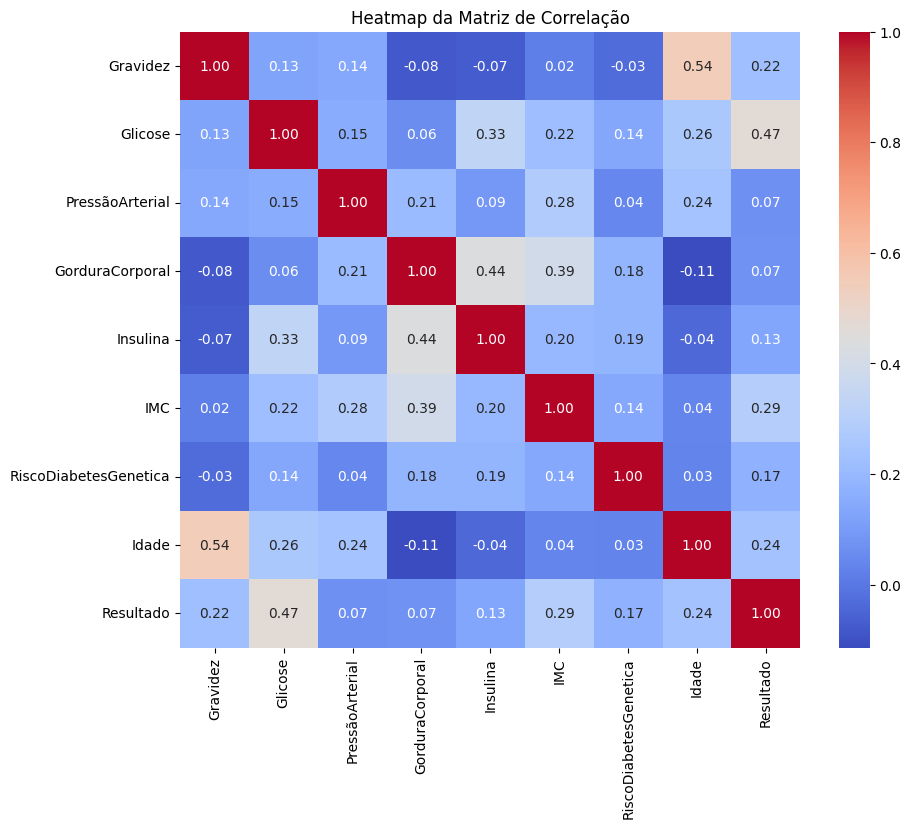

In [39]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap da Matriz de Correlação')
plt.show()

## *Correlações das variáveis com a "variável resposta"*

In [41]:
correlation_matrix = df.corr()
diabetes_correlation = correlation_matrix['Resultado'].sort_values(ascending=False)
print(diabetes_correlation)

Resultado                1.000000
Glicose                  0.466581
IMC                      0.292695
Idade                    0.238356
Gravidez                 0.221898
RiscoDiabetesGenetica    0.173844
Insulina                 0.130548
GorduraCorporal          0.074752
PressãoArterial          0.065068
Name: Resultado, dtype: float64


## *Treinamento do Modelo*

In [42]:
acuracia_modelo1 = []
acuracia_modelo2 = []
acuracia_modelo3 = []

precisao_modelo1 = []
precisao_modelo2 = []
precisao_modelo3 = []

In [ ]:
X = df[['Glicose', 'IMC', 'Idade', 'Gravidez', 'RiscoDiabetesGenetica', 'Insulina', 'GorduraCorporal', 'PressãoArterial']]
Y = df['Resultado']
    

In [45]:
np.random.seed(14)

iteracoes = 50
train_size = 0.70

for i in range(iteracoes):

    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, train_size = train_size)

    # Modelo 1 =  SVM
    model1 = SVC()
    model1.fit(X_treino, Y_treino)

    # Modelo 2 =  Random Forest
    model2 = RandomForestClassifier(n_estimators=1000)
    model2.fit(X_treino, Y_treino)

    # Modelo 3 =  KNN
    model3 = KNeighborsClassifier(n_neighbors=5)
    model3.fit(X_treino, Y_treino)

    predictions1 = model1.predict(X_teste)
    acuracia_modelo1.append(accuracy_score(Y_teste, predictions1))
    precisao_modelo1.append(precision_score(Y_teste, predictions1))

    predictions2 = model2.predict(X_teste)
    acuracia_modelo2.append(accuracy_score(Y_teste, predictions2))
    precisao_modelo2.append(precision_score(Y_teste, predictions2))

    predictions3 = model3.predict(X_teste)
    acuracia_modelo3.append(accuracy_score(Y_teste, predictions3))
    precisao_modelo3.append(precision_score(Y_teste, predictions3))



## *Avaliação do Modelo*

In [47]:
print('Média acurácia modelo 1:')
print(np.round(np.mean(acuracia_modelo1),2))
print('Média acurácia modelo 2:')
print(np.round(np.mean(acuracia_modelo2),2))
print('Média acurácia modelo 3:')
print(np.round(np.mean(acuracia_modelo3),2))

Média acurácia modelo 1:
0.76
Média acurácia modelo 2:
0.76
Média acurácia modelo 3:
0.72


In [48]:
print('Média precisão modelo 1:')
print(np.round(np.mean(precisao_modelo1),2))
print('Média precisão modelo 2:')
print(np.round(np.mean(precisao_modelo2),2))
print('Média precisão modelo 3:')
print(np.round(np.mean(precisao_modelo3),2))

Média precisão modelo 1:
0.73
Média precisão modelo 2:
0.68
Média precisão modelo 3:
0.61


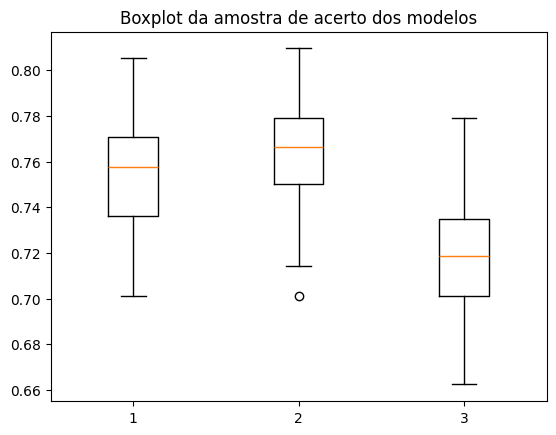

In [49]:
dados_resultados_acuracia =[acuracia_modelo1, acuracia_modelo2, acuracia_modelo3]

plt.boxplot(dados_resultados_acuracia)
plt.title("Boxplot da amostra de acerto dos modelos")
plt.show()

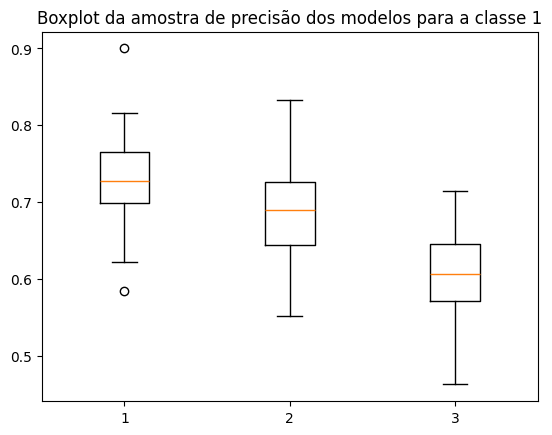

In [50]:
dados_resultados_precisao =[precisao_modelo1, precisao_modelo2, precisao_modelo3]

plt.boxplot(dados_resultados_precisao)
plt.title("Boxplot da amostra de precisão dos modelos para a classe 1")
plt.show()

## *Predição (Uso) do Modelo*

In [ ]:
glicose = int(input('Informe o nível de glicose do paciente: '))
imc = float(input('Informe o índice de massa corporal (IMC) do paciente: '))
idade = int(input('Informe a idade do paciente: '))
gravidez = int(input('Informe o número de gravidez do paciente: '))
risco_diabetes_genetica = float(input('Informe a função de pedigree de diabetes do paciente: '))
insulina = int(input('Informe o nível de insulina do paciente: '))
gordura_corporal = int(input('Informe a gordura corporal do paciente: '))
pressao = int(input('Informe a pressão arterial observada do paciente: '))

# colunas_ptbr = {
#     'Pregnancies': 'Gravidez',
#     'Glucose': 'Glicose',
#     'BloodPressure': 'PressãoArterial',
#     'SkinThickness': 'GorduraCorporal',
#     'Insulin': 'Insulina',
#     'BMI': 'IMC',
#     'DiabetesPedigreeFunction': 'RiscoDiabetesGenetica',
#     'Age': 'Idade',
#     'Outcome': 'Resultado' # 0 = Não possui diabetes, 1 = Possui diabetes
# }


In [64]:
novo_paciente = [[glicose, imc, idade, gravidez, risco_diabetes_genetica, insulina, gordura_corporal, pressao]]
variaveis = ['Glicose', 'IMC', 'Idade','Gravidez', 'RiscoDiabetesGenetica', 'Insulina', 'GorduraCorporal', 'PressãoArterial']
novo_paciente =  pd.DataFrame(novo_paciente, columns = variaveis)
resposta = model1.predict(novo_paciente)    #Troque  o X pelo melhor número do melhor modelo (1, 2 ou 3?)

for i in range(len(resposta)):
  if resposta[i] == 1.0 :
    print('Muita chance de desenvolver Diabetes')
  else:
    print('Pouca chance de desenvolver Diabetes')

Pouca chance de desenvolver Diabetes


## *Salvando em um novo CSV p/ análises futuras*


In [46]:
df.to_csv('Pima_Indians.csv', index=False)
print('Arquivo salvo como Pima_Indians.csv')

Arquivo salvo como Pima_Indians.csv
